# water properties worldwide: compressibility, thermal expansion ...

In [1]:
import xarray as xr
import gsw

In [2]:
files_woa = ['woa18_A5B7_t00_01.nc','woa18_A5B7_s00_01.nc']
woa = xr.merge([xr.open_dataset(f, decode_times=False) for f in files_woa]).isel(time=0)
print(woa)

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
    time                float32 726.0
Dimensions without coordinates: nbounds
Data variables: (12/19)
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 90.0
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 ... 179.0 180.0
    depth_bnds          (depth, nbounds) float32 0.0 2.5 ... 5.45e+03 5.5e+03
    climatology_bounds  (nbounds) float32 648.0 738.0
    t_an                (depth, lat, lon) float32 ...
    ...                  ...
    s_mn                (depth, lat, lon) float32 ...
    s_dd                (depth, lat, lon) float64 ...
    s_sd                (depth, lat

In [3]:
t, s, lon, lat, p = xr.broadcast(woa.t_an, woa.s_an, woa.lon, woa.lat, woa.depth)

In [4]:
ds = xr.merge([t.rename("t"), s.rename("s"), p.rename("p")])

In [5]:
ds["SA"] = gsw.SA_from_SP(ds["s"], ds["p"], ds.lon, ds.lat)
ds["CT"] = gsw.CT_from_t(ds["SA"], ds["t"], ds["p"])

ds["kappa"] = gsw.kappa(ds.SA, ds.CT, ds.p) # isentropic compressibility of seawater 1/Pa
ds["alpha"] = gsw.alpha(ds.SA, ds.CT, ds.p)
ds["beta"] = gsw.beta(ds.SA, ds.CT, ds.p)

In [14]:
gsw.beta?

Signature: gsw.beta(SA, CT, p)
Docstring:
Calculates the saline (i.e. haline) contraction coefficient of seawater
at constant Conservative Temperature using the computationally-efficient
75-term expression for specific volume in terms of SA, CT and p
(Roquet et al., 2015).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
CT : array-like
    Conservative Temperature (ITS-90), degrees C
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar

Returns
-------
beta : array-like, kg/g
    saline contraction coefficient
    at constant Conservative Temperature
File:      ~/.miniconda3/envs/cognac/lib/python3.8/site-packages/gsw/_wrapped_ufuncs.py
Type:      function


In [6]:
#CT = xr.DataArray(CT, coords=t.coords, dims=t.dims, name='CT')
#SA = xr.DataArray(CT, coords=t.coords, dims=t.dims, name='SA')
#appa = xr.DataArray(kappa, coords=t.coords, dims=t.dims, name='kappa')

(array([9.74000e+02, 7.81990e+04, 4.57225e+05, 5.68675e+05, 9.60308e+05,
        6.63927e+05, 3.26571e+05, 2.10068e+05, 3.87030e+04, 3.60000e+02]),
 array([3.85144890e-10, 3.95851551e-10, 4.06558211e-10, 4.17264872e-10,
        4.27971532e-10, 4.38678193e-10, 4.49384853e-10, 4.60091514e-10,
        4.70798174e-10, 4.81504835e-10, 4.92211495e-10]),
 <BarContainer object of 10 artists>)

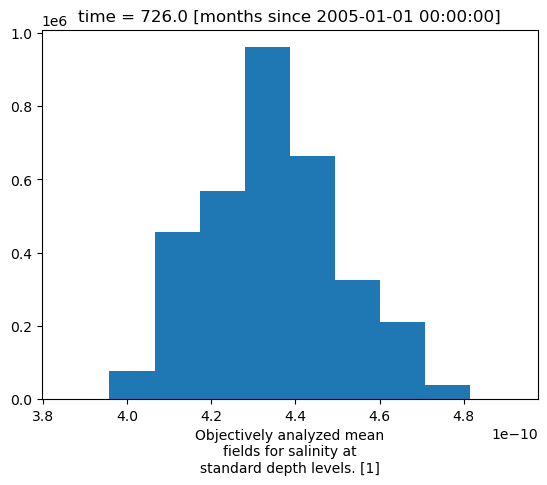

In [7]:
ds.kappa.plot.hist()

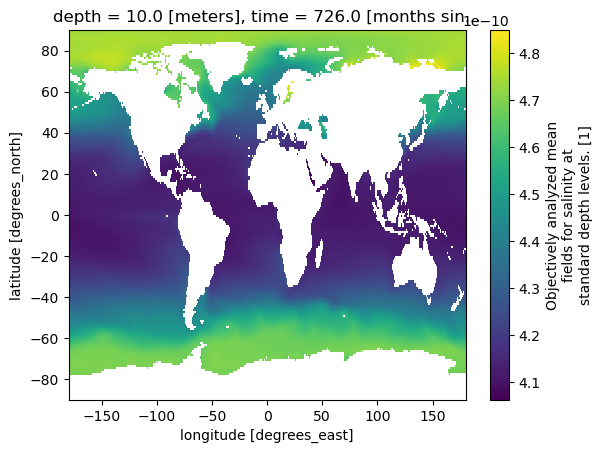

In [8]:
ds.kappa.sel(depth=10).plot()

In [13]:
#p.isel(depth=0)

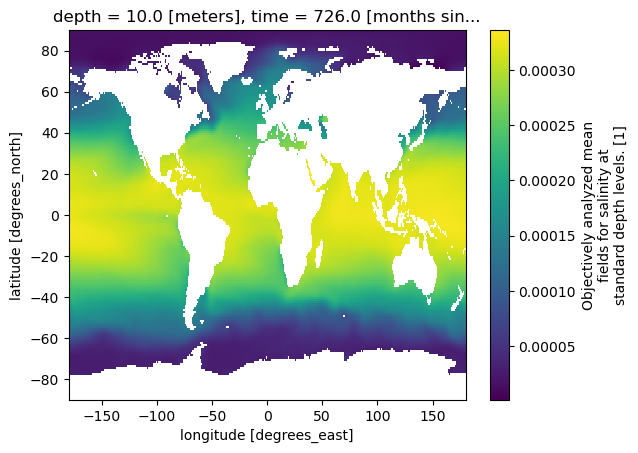

In [9]:
ds.alpha.sel(depth=10).plot()

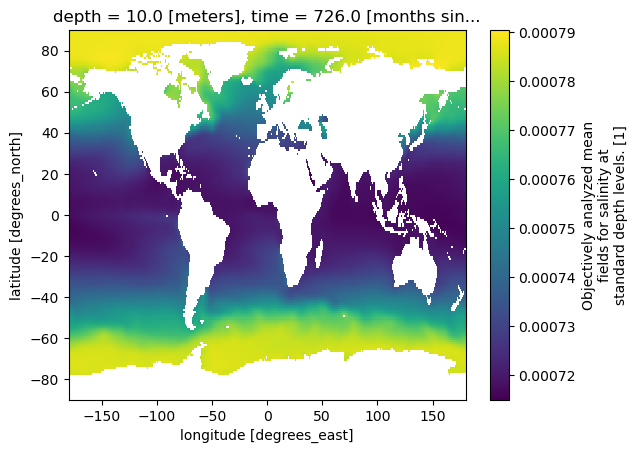

In [10]:
ds.beta.sel(depth=10).plot()